In [38]:
%matplotlib inline
from astropy.io import fits
from astropy import units as u
import os
import pickle as pickle
from astropy.stats import sigma_clipped_stats
from astropy.time import Time
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys;print(sys.prefix)

C:\Users\taiwe\anaconda3


In [39]:
%pylab inline
from astropy.io import fits
import astropy.units as u
import pickle
import os
import pandas as pd

from spec_utils.spec_utils import read_irs

from spectools_ir.utils import extract_hitran_data, spec_convol, make_rotation_diagram, get_molmass
from spectools_ir.utils import compute_thermal_velocity, sigma_to_fwhm, fwhm_to_sigma, wn_to_k, spec_convol_R
from spectools_ir.utils import get_miri_mrs_resolution, get_miri_mrs_wavelengths, make_miri_mrs_figure

from spectools_ir.flux_calculator import calc_fluxes, make_lineshape

from spectools_ir.slabspec import make_spec

from spectools_ir.slab_fitter import Config, LineData,Retrieval
from spectools_ir.slab_fitter import corner_plot, trace_plot, find_best_fit, compute_model_fluxes
from spectools_ir.slab_fitter import calc_solid_angle, calc_radius
from spectools_ir.slab_fitter import read_data_from_file, get_samples

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


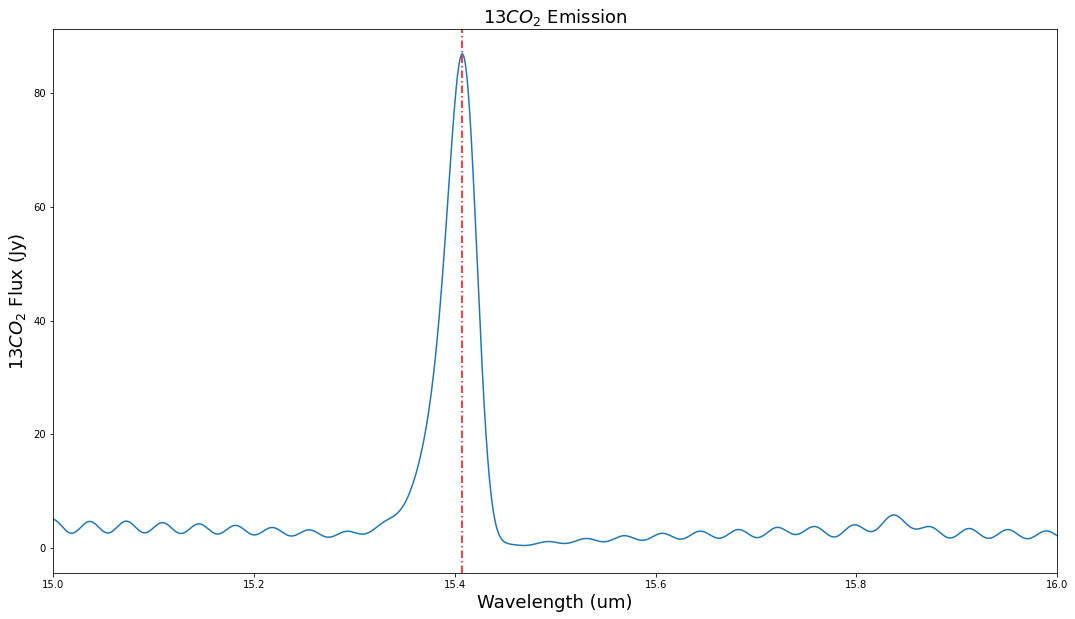

In [61]:
out_13co2=pickle.load(open(r"C:\Users\taiwe\Documents\13co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_13co2['spectrum']['wave'],out_13co2['spectrum']['convolflux'])
plt.xlim(15, 16)
plt.title('13$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('13$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p13 = find_peaks(out_13co2['spectrum']['convolflux'], height=20)
peak13 = out_13co2['spectrum']['wave'][p13[0][0]]
plt.axvline(x=peak13,c='red', dashes=(5, 2, 1, 2))

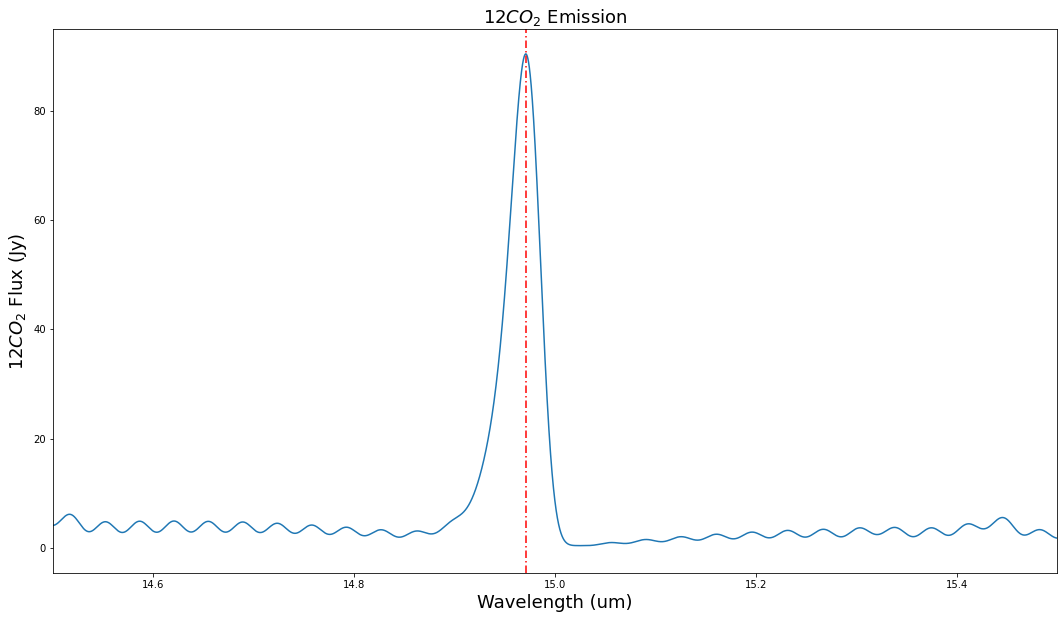

In [62]:
out_12co2=pickle.load(open(r"C:\Users\taiwe\Documents\co2_1e19_500_1au2_1pc_irs.p",'rb'))
fig=plt.figure(1,figsize=(18,10))
plt.plot(out_12co2['spectrum']['wave'],out_12co2['spectrum']['convolflux'])
plt.xlim(14.5, 15.5)
plt.title('12$CO_2$ Emission',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('12$CO_2$ Flux (Jy)',fontsize=18)

from scipy.signal import find_peaks
p12 = find_peaks(out_12co2['spectrum']['convolflux'], height=20)
peak12 = out_12co2['spectrum']['wave'][p12[0][0]]
plt.axvline(x=peak12,c='red', dashes=(5, 2, 1, 2))

(-0.1, 0.5)

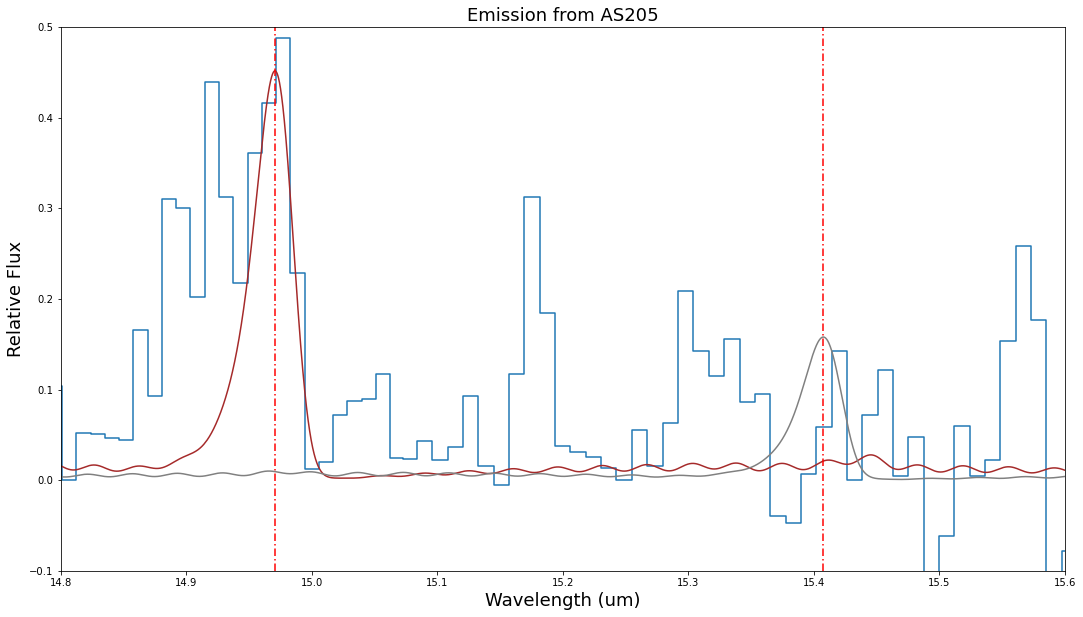

In [133]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 200

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 550

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('AS205_c2d',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from AS205',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.1, .5)

(-0.01, 0.035)

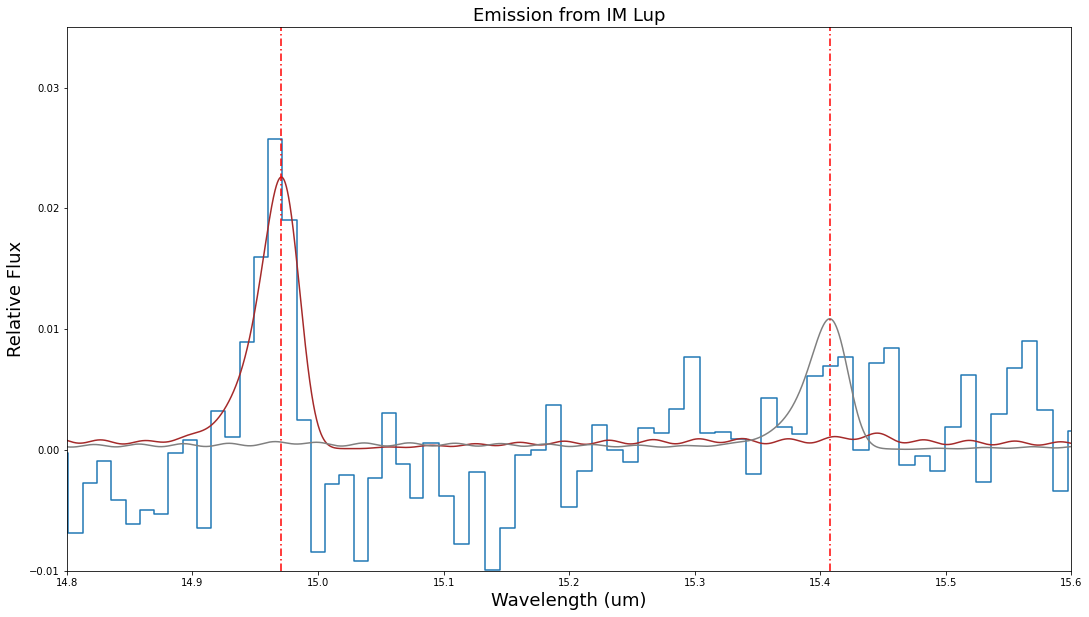

In [134]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('IMLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from IM Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.01, .035)

(-0.02, 0.035)

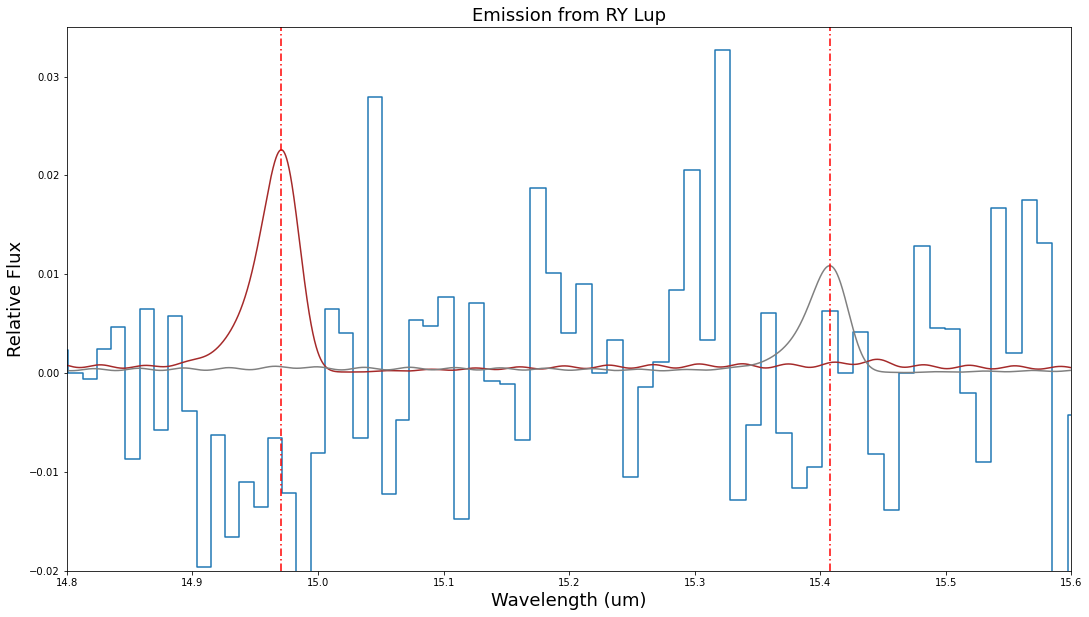

In [135]:
fig=plt.figure(1,figsize=(18,10))
flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('RYLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from RY Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .035)

(-0.02, 0.3)

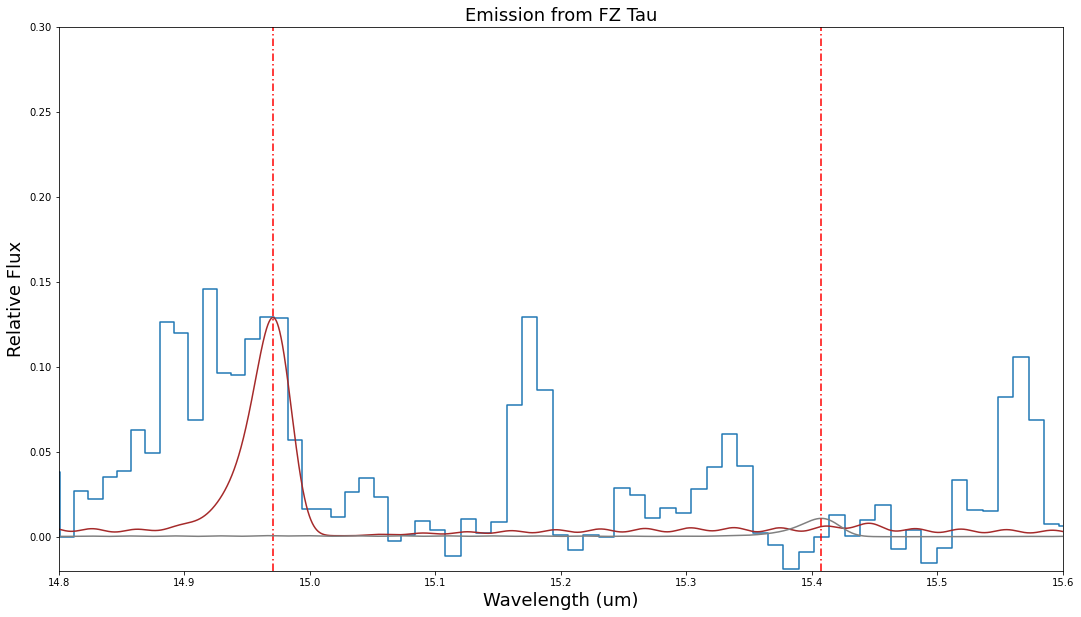

In [139]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 700

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('FZTAU',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from FZ Tau',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .3)

(-0.02, 0.035)

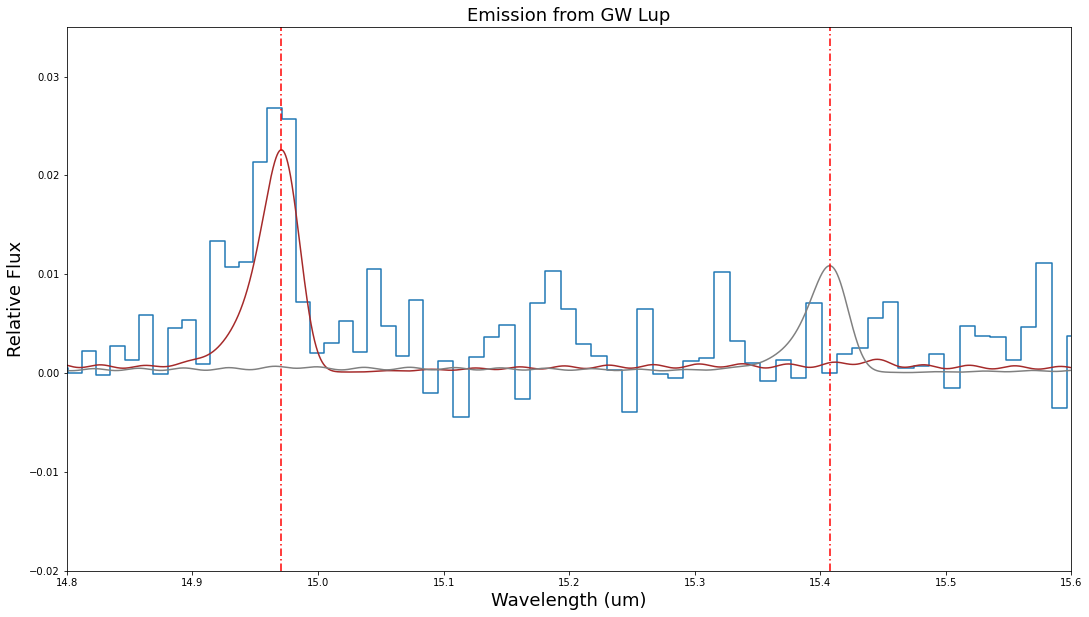

In [144]:
fig=plt.figure(1,figsize=(18,10))

flux121 = out_12co2['spectrum']['wave']
flux122 = out_12co2['spectrum']['convolflux'] / 4000

flux131 = out_13co2['spectrum']['wave']
flux132 = out_13co2['spectrum']['convolflux'] / 8000

path = os.getcwd() + '/REDUCED/'
gwlup=read_irs('GWLUP',dd=path,noerror=True)
plt.plot(gwlup.wave,gwlup.flux, drawstyle='steps-mid')
plt.plot(flux121, flux122, c='brown')
plt.axvline(x=peak12, c='red', dashes=(5, 2, 1, 2))
plt.plot(flux131, flux132, c='grey')
plt.axvline(x=peak13, c='red', dashes=(5, 2, 1, 2))

plt.title('Emission from GW Lup',fontsize=18)
plt.xlabel('Wavelength (um)',fontsize=18)
plt.ylabel('Relative Flux',fontsize=18)

plt.xlim(14.8, 15.6)
plt.ylim(-.02, .035)

In [24]:
!pip install spectools-ir